# Home Credit Default Risk

1. Introdução
2. Descrição dos dados
3. Carregando os dados
4. Análise Exploratória

    4.1 Empréstimos - dados de treinamento | Loan - train data set
        4.1.1 Distribuição da variavel Target | Target Distribuction 
        4.1.2 Analise dos empréstimos | Loan analysis
    4.2 Analise do histórico de crédito | Todo 
        4.2.1 Crédito anteriores fornecidos por outras instituições | Todo 
        4.2.2 Crédito anteriores na Credit Bureau | Todo 
        4.2.3 Histórico mensal de emprestimo na Home Credit | Todo 
        4.2.4 Histórico mensal no cartão de crédito na Home Credit | Todo 
        4.2.5 Solicitações de crédito anteriores na Home Credit | Todo 
        4.2.6 Histórico de amortização na Home Credit | Todo 
    4.3 Todo
5. Correlação | Correlation
6. Feature Selection with Random Forest
7. ...

## 1. Introdução 

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

[Home Credit Group](http://www.homecredit.net/) strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## 2. Descrição dos Dados


* application_{train|test}.csv

    * This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
    * Static data for all applications. One row represents one loan in our data sample.

* bureau.csv

    * All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
    * For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

* bureau_balance.csv

    * Monthly balances of previous credits in Credit Bureau.
    * This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

* POS_CASH_balance.csv

Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.
credit_card_balance.csv

Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.
previous_application.csv

All previous applications for Home Credit loans of clients who have loans in our sample.
There is one row for each previous application related to loans in our data sample.
installments_payments.csv

Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
There is a) one row for every payment that was made plus b) one row each for missed payment.
One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.
HomeCredit_columns_description.csv

This file contains descriptions for the columns in the various data files.

![teste](home_credit.png)

** Pacotes **

In [1]:
# Instalação dos pacotes.
# !pip install imblearn
# !pip install lightgbm

import time
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import fbeta_score
from sklearn.metrics import classification_report

# DataViz
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()

# import cufflinks and offline mode
import cufflinks as cf
cf.go_offline()

%matplotlib inline
# plt.style.use('fivethirtyeight')
# plt.style.use('ggplot')
plt.style.use('bmh')
# sns.set_style('whitegrid')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


## 3. Carregando os dados

In [2]:
def load_data(data_src):
    
    start_time = time.time()
    
    train = pd.read_csv('{}application_train.csv'.format(data_src))
    test = pd.read_csv('{}application_test.csv'.format(data_src))
    print('Train and test tables loaded.')
    
    bureau = pd.read_csv('{}bureau.csv'.format(data_src))
    bureau_bal = pd.read_csv('{}bureau_balance.csv'.format(data_src))
    print('Bureau data loaded.')
    
    prev = pd.read_csv('{}previous_application.csv'.format(data_src))
    print('Previous applications data loaded.')
    
    cred_card_bal = pd.read_csv('{}credit_card_balance.csv'.format(data_src))
    print('Credit card balance loaded.')
    
    pos_cash_bal = pd.read_csv('{}POS_CASH_balance.csv'.format(data_src))
    print('POS cash balance loaded.')
    
    ins = pd.read_csv('{}installments_payments.csv'.format(data_src))
    print('Installments data loaded.')
    
    # error if using engine c - 'utf-8' codec can't decode byte 0x85
    data_description = pd.read_csv('{}HomeCredit_columns_description.csv'.format(data_src), engine='python')
    
    print('Time it took to load all the data: {:.4f}s\n'.format(time.time() - start_time))
    
    return train, test, bureau, bureau_bal, prev, cred_card_bal, pos_cash_bal, ins, data_description

train, test, bureau, bureau_bal, prev, cred_card_bal, pos_cash_bal, ins, data_description = load_data('data/all/')

# Copia 
df_train = train.copy()
df_test = test.copy()

Train and test tables loaded.
Bureau data loaded.
Previous applications data loaded.
Credit card balance loaded.
POS cash balance loaded.
Installments data loaded.
Time it took to load all the data: 59.1488s



## 4. Analise Exploratória

## Todo: Realizar analise exploratoria para entender os dados 

** Todo: **

1. Describle das variaveis númericas
2. Barplot das categóricas


### Missing values

** Todo **

* Tratar os dados missing das variáveis númericas. As categoricas são tratadas pelo LabelEnconde.

In [4]:
def missing_data(data):
    total = data.isnull().count()
    missing = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    return pd.concat([total, missing, percent], axis=1, 
                     keys=['Total', 'Missing', 'Percent']) \
                     .sort_values(by=['Percent'], ascending=False)

** Missing values no dataset de treino **

In [5]:
# train dataset
missing_data(train).head(10)

,Total,Missing,Percent
COMMONAREA_MEDI,307511,214865,69.872297
COMMONAREA_AVG,307511,214865,69.872297
COMMONAREA_MODE,307511,214865,69.872297
NONLIVINGAPARTMENTS_MODE,307511,213514,69.432963
NONLIVINGAPARTMENTS_AVG,307511,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,307511,213514,69.432963
FONDKAPREMONT_MODE,307511,210295,68.386172
LIVINGAPARTMENTS_MODE,307511,210199,68.354953
LIVINGAPARTMENTS_AVG,307511,210199,68.354953
LIVINGAPARTMENTS_MEDI,307511,210199,68.354953


** Missing values no dataset de Teste **

In [6]:
# test dataset
missing_data(test).head(10)

,Total,Missing,Percent
COMMONAREA_AVG,48744,33495,68.716150
COMMONAREA_MODE,48744,33495,68.716150
COMMONAREA_MEDI,48744,33495,68.716150
NONLIVINGAPARTMENTS_AVG,48744,33347,68.412523
NONLIVINGAPARTMENTS_MODE,48744,33347,68.412523
NONLIVINGAPARTMENTS_MEDI,48744,33347,68.412523
FONDKAPREMONT_MODE,48744,32797,67.284179
LIVINGAPARTMENTS_AVG,48744,32780,67.249302
LIVINGAPARTMENTS_MODE,48744,32780,67.249302
LIVINGAPARTMENTS_MEDI,48744,32780,67.249302


** Análise dados categóricos **

Elementos distintos em cada feature categórica

In [6]:
# Number of unique classes in each object column
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### Distribuição da variável Target

Distribuição da variável - Good(0) e Bad(1): 
0    282686
1     24825
Name: TARGET, dtype: int64


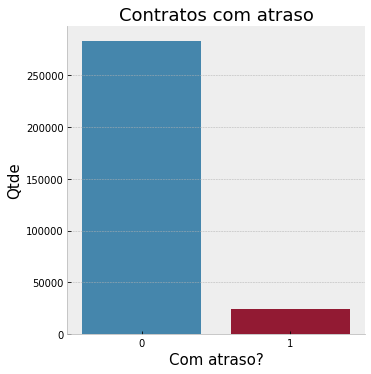

In [3]:
print("Distribuição da variável - Good(0) e Bad(1): ")
print(train["TARGET"].value_counts())

sns.factorplot(x ="TARGET", kind='count', data=train, size=5)
plt.title("Contratos com atraso", fontsize=18)
plt.xlabel("Com atraso?", fontsize=15)
plt.ylabel("Qtde", fontsize=15)
plt.show()

### Qtde por feature e porcentagem de inadimplentes 

In [4]:
def plot_stats(data, feature, label_rotation=False, horizontal_layout=True):
    temp = data[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})
    #sns.set_style('whitegrid')
    
    # Calculate the percentage of target=1 per category value
    cat_perc = data[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

** Análise por Tipo de Contrato **

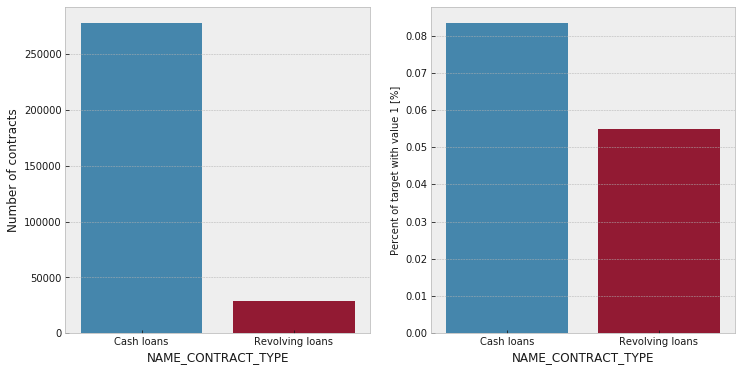

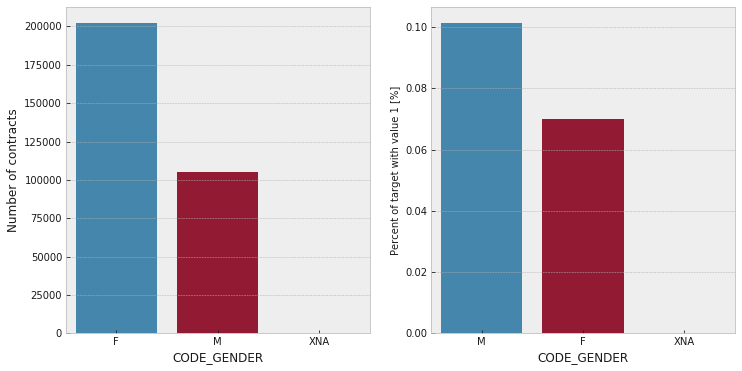

In [5]:
plot_stats(train, 'NAME_CONTRACT_TYPE')
plot_stats(train, 'CODE_GENDER')

## 

In [7]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


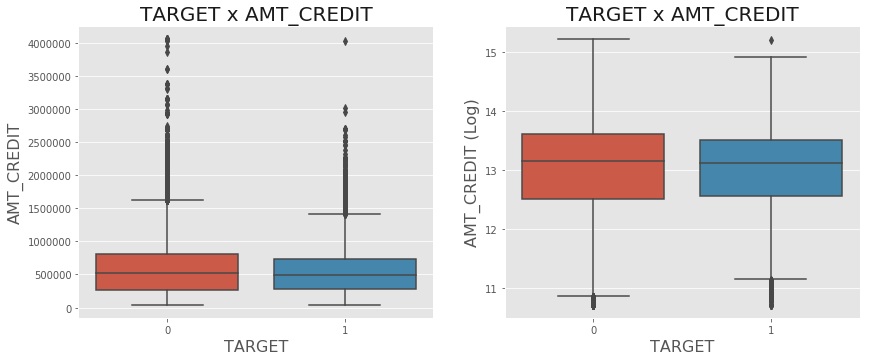

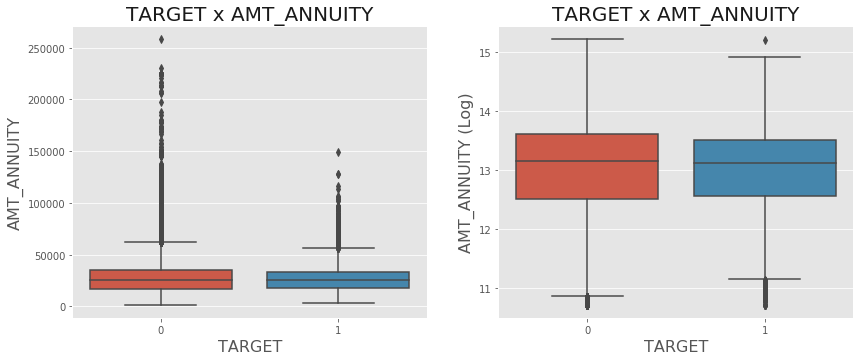

In [29]:
def plot_distribution(df, feature):

    #Feature engineering to a better visualization of the values
    df['{}_log'.format(feature)] = np.log(df.AMT_CREDIT + 0.01)

    plt.figure(figsize=(14,6))
    #I will explore the Amount by Class and see the distribuition of Amount transactions
    plt.subplot(121)
    ax = sns.boxplot(x ="TARGET",y=feature,
                     data=df)
    ax.set_title("TARGET x {}".format(feature), fontsize=20)
    ax.set_xlabel("TARGET", fontsize=16)
    ax.set_ylabel(feature, fontsize = 16)

    plt.subplot(122)
    ax1 = sns.boxplot(x ="TARGET", y='{}_log'.format(feature), data=df)
    ax1.set_title("TARGET x {}".format(feature), fontsize=20)
    ax1.set_xlabel("TARGET", fontsize=16)
    ax1.set_ylabel("{} (Log)".format(feature), fontsize = 16)

    plt.subplots_adjust(hspace = 0.6, top = 0.8)

    plt.show()
    
    
plot_distribution(train, 'AMT_CREDIT')
plot_distribution(train, 'AMT_ANNUITY')

** Cross tab **

In [7]:
# Distribuição de inadimplencia de acordo com a feature passada como parametro

def description_distribution(data, feature, by='TARGET', margins=True, isNormalize=False):
    return pd.crosstab(data[feature], train[by], margins=margins, normalize=isNormalize)
        
description_distribution(train, 'CODE_GENDER')

TARGET,0,1,All
CODE_GENDER,,,
F,188278,14170,202448
M,94404,10655,105059
XNA,4,0,4
All,282686,24825,307511


In [8]:
pd.crosstab(train['OWN_CAR_AGE'], train['TARGET']).apply(lambda r: r/r.sum(), axis=1).head(10)

# description_distribution(train, 'OWN_CAR_AGE')

TARGET,0,1
OWN_CAR_AGE,,
0.0,0.931115,0.068885
1.0,0.936364,0.063636
2.0,0.940021,0.059979
3.0,0.950078,0.049922
4.0,0.946014,0.053986
5.0,0.948261,0.051739
6.0,0.944218,0.055782
7.0,0.941676,0.058324
8.0,0.936980,0.063020


In [10]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(data, var,nrow=2):
    
    i = 0
    t1 = data.loc[data['TARGET'] != 0]
    t0 = data.loc[data['TARGET'] == 0]

    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning:

invalid value encountered in greater

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning:

invalid value encountered in less



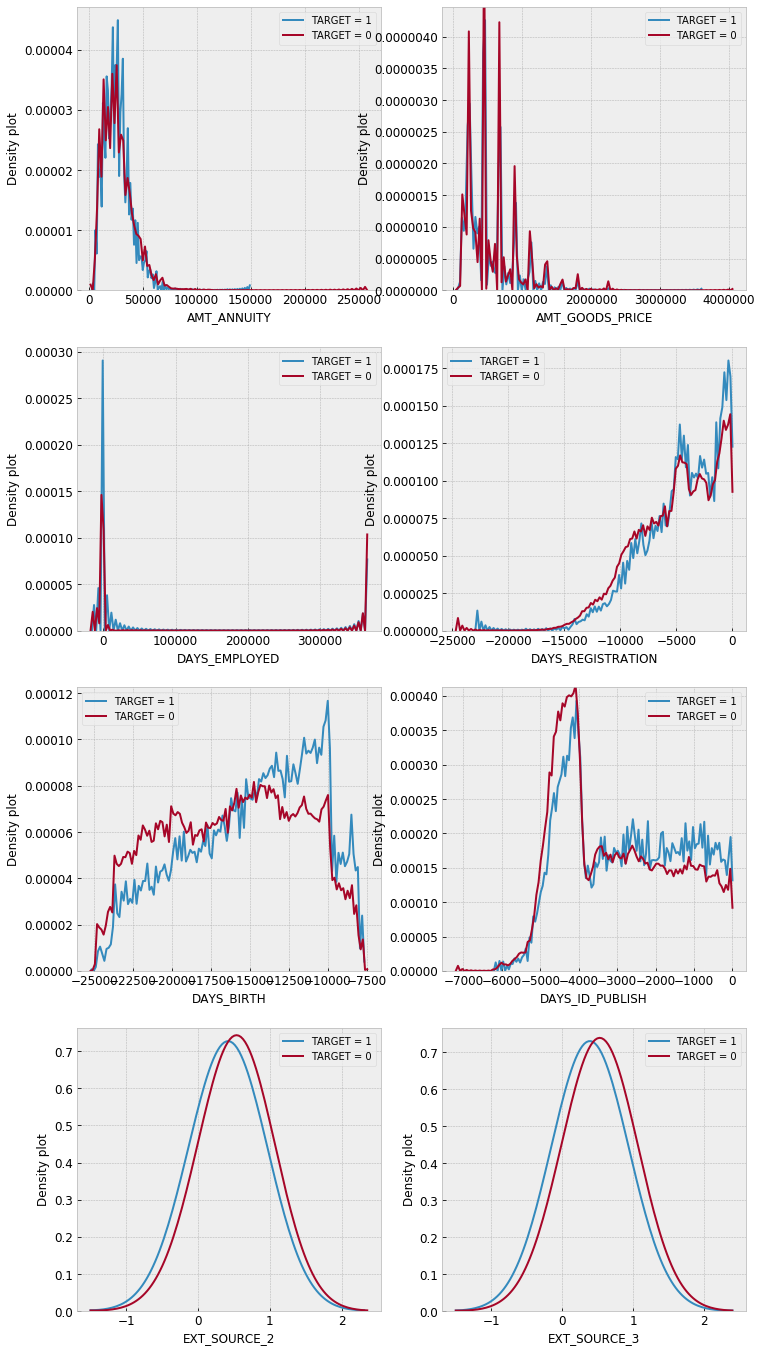

In [17]:
var = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', 
       'DAYS_REGISTRATION','DAYS_BIRTH','DAYS_ID_PUBLISH',
      'EXT_SOURCE_2', 'EXT_SOURCE_3']
plot_distribution_comp(train, var,nrow=4)

## Pearson Correlation of features

In [6]:
def plot_heatmap(dataset):
    data = [
        go.Heatmap(
            z= dataset.corr().values,
            x=dataset.columns.values,
            y=dataset.columns.values,
            colorscale='Viridis',
            reversescale = False,
            text = True ,
            opacity = 1.0 )
    ]

    layout = go.Layout(
        title='Pearson Correlation of features',
        xaxis = dict(ticks='', nticks=36),
        yaxis = dict(ticks='' ),
        width = 900, height = 700,
    margin=dict(
        l=240,
    ),)

    fig = go.Figure(data=data, layout=layout)
    return py.iplot(fig, filename='labelled-heatmap')

plot_heatmap(train)

** Correlations **

Now that we have dealt with the categorical variables and the outliers, let's continue with the EDA. One way to try and understand the data is by looking for correlations between the features and the target. We can calculate the Pearson correlation coefficient between every variable and the target using the .corr dataframe method.

The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some general interpretations of the absolute value of the correlation coefficent are:

* .00-.19 “very weak”
* .20-.39 “weak”
* .40-.59 “moderate”
* .60-.79 “strong”
* .80-1.0 “very strong”

In [6]:
# Find correlations with the target and sort
correlations = abs(train.corr()['TARGET']).sort_values(ascending=False)

# Display correlations
# print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(20))


Most Negative Correlations:
 TARGET                         1.000000
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                  0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
FLOORSMAX_AVG                  0.044003
FLOORSMAX_MEDI                 0.043768
FLOORSMAX_MODE                 0.043226
DAYS_REGISTRATION              0.041975
AMT_GOODS_PRICE                0.039645
OWN_CAR_AGE                    0.037612
Name: TARGET, dtype: float64


In [ ]:
def plot_sns_heatmap():
    colormap = plt.cm.Greens
    plt.figure(figsize=(14,12))

    sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, 
                 cmap = colormap, linecolor='white'
               #, square=True, annot=True
               )
    return plt.show()
    
# plot_sns_heatmap()

## Feature Engineering

CREDIT_INCOME_PERCENT: a porcentagem do valor do crédito em relação à receita do cliente
ANNUITY_INCOME_PERCENT: a porcentagem da anuidade do empréstimo em relação à receita do cliente
CREDIT_TERM: a duração do pagamento em meses (desde que a anuidade é o valor mensal devido
DAYS_EMPLOYED_PERCENT: a porcentagem dos dias empregados em relação à idade do cliente

In [7]:
train['CREDIT_INCOME_PERCENT'] = train['AMT_CREDIT'] / train['AMT_INCOME_TOTAL']
train['ANNUITY_INCOME_PERCENT'] = train['AMT_ANNUITY'] / train['AMT_INCOME_TOTAL']
train['CREDIT_TERM'] = train['AMT_ANNUITY'] / train['AMT_CREDIT']
train['DAYS_EMPLOYED_PERCENT'] = train['DAYS_EMPLOYED'] / train['DAYS_BIRTH']

In [8]:
test['CREDIT_INCOME_PERCENT'] = test['AMT_CREDIT'] / test['AMT_INCOME_TOTAL']
test['ANNUITY_INCOME_PERCENT'] = test['AMT_ANNUITY'] / test['AMT_INCOME_TOTAL']
test['CREDIT_TERM'] = test['AMT_ANNUITY'] / test['AMT_CREDIT']
test['DAYS_EMPLOYED_PERCENT'] = test['DAYS_EMPLOYED'] / test['DAYS_BIRTH']

### Pre processing

* Depois posicionar no código para a parte de modelagem *

In [17]:
# Groupby the client id (SK_ID_CURR), count the number of previous loans, and rename the column
previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'})
previous_loan_counts.head()

,SK_ID_CURR,previous_loan_counts
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


In [9]:
## Qtde de emprestimos em outras entidades. ESTOU AQUI!!!

# Groupby the client id (SK_ID_CURR), count the number of previous loans, and rename the column
previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'})
train = train.merge(previous_loan_counts, on = 'SK_ID_CURR', how = 'left')
test = test.merge(previous_loan_counts, on = 'SK_ID_CURR', how = 'left')
# Fill the missing values with 0 
train['previous_loan_counts'] = train['previous_loan_counts'].fillna(0)
test['previous_loan_counts'] = test['previous_loan_counts'].fillna(0)


# Group by the client id, calculate aggregation statistics
bureau_agg = bureau.drop(['SK_ID_BUREAU'], axis=1).groupby('SK_ID_CURR', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()
# bureau_agg.head()

# List of column names
columns = ['SK_ID_CURR']

# Iterate through the variables names
for var in bureau_agg.columns.levels[0]:
    # Skip the id name
    if var != 'SK_ID_CURR':
        
        # Iterate through the stat names
        for stat in bureau_agg.columns.levels[1][:-1]:
            # Make a new column name for the variable and stat
            columns.append('bureau_%s_%s' % (var, stat))
            
# Assign the list of columns names as the dataframe column names
bureau_agg.columns = columns
bureau_agg.head()

,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100001,7,-735.000000,-49,-1572,-5145,7,0.0,0,0,...,7,-93.142857,-6,-155,-652,7,3545.357143,10822.5,0.0,24817.5
1,100002,8,-874.000000,-103,-1437,-6992,8,0.0,0,0,...,8,-499.875000,-7,-1185,-3999,7,0.000000,0.0,0.0,0.0
2,100003,4,-1400.750000,-606,-2586,-5603,4,0.0,0,0,...,4,-816.000000,-43,-2131,-3264,0,NaN,NaN,NaN,NaN
3,100004,2,-867.000000,-408,-1326,-1734,2,0.0,0,0,...,2,-532.000000,-382,-682,-1064,0,NaN,NaN,NaN,NaN
4,100005,3,-190.666667,-62,-373,-572,3,0.0,0,0,...,3,-54.333333,-11,-121,-163,3,1420.500000,4261.5,0.0,4261.5


In [10]:
# Now we simply merge with the training data as we did before.

# Merge with the training data
train = train.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,8.0,-499.875,-7.0,-1185.0,-3999.0,7.0,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,4.0,-816.000,-43.0,-2131.0,-3264.0,0.0,NaN,NaN,NaN,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,2.0,-532.000,-382.0,-682.0,-1064.0,0.0,NaN,NaN,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1.0,-783.000,-783.0,-783.0,-783.0,0.0,NaN,NaN,NaN,NaN


In [11]:
# Merge with the value counts of bureau
test = test.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')

print(df_train.shape)
print(train.shape)

print(df_test.shape)
print(test.shape)



(307511, 122)
(307511, 187)
(48744, 121)
(48744, 186)


## Feature Importance using Random forest

** Normalizando features categóricas **

In [12]:
# Trasnforma as variaveis categoricas/string numero - label encoder

categorical_feats = [f for f in train.columns if train[f].dtype == 'object']

def normalize_categoric(categorical_feats, train, test): 
    
    for col in categorical_feats:
        lb = preprocessing.LabelEncoder()
        lb.fit(list(train[col].values.astype('str')) + list(test[col].values.astype('str')))
        train[col] = lb.transform(list(train[col].values.astype('str')))
        test[col] = lb.transform(list(test[col].values.astype('str')))
        
    return train, test
        
train, test = normalize_categoric(categorical_feats, train, test)

In [19]:
# print(categorical_feats)

train[categorical_feats].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,0,1,0,1,6,7,4,3,1,8,6,5,3,0,5,0
1,0,0,0,0,1,4,1,1,1,3,1,39,3,0,0,0
2,1,1,1,1,6,7,4,3,1,8,1,11,0,1,7,2
3,0,0,0,1,6,7,4,0,1,8,6,5,0,1,7,2
4,0,1,0,1,6,7,4,3,1,3,4,37,0,1,7,2


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.8s finished


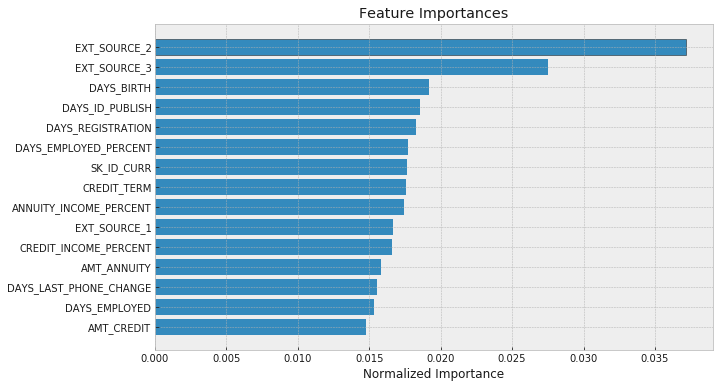

In [14]:
from sklearn.ensemble import RandomForestClassifier

def plot_feature_importances(df):
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

# Train on the training data
random_forest.fit(app_train, train['TARGET'])

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(app_test)[:, 1]

# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)

In [33]:
## ENTENDER TODA ESSA LOGICA - pois gerou um resultado muito melhor que o que estava conseguindo atingir antes
# De 0.69 fui para 0.76 no Kaggle. 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb # ESTOU AQUI!!!
import gc

def model(features, test_features, encoding = 'le', n_folds = 5):
    
    """Train and test a light gradient boosting model using
    cross validation. 
    
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
        encoding (str, default = 'ohe'): 
            method for encoding categorical variables. Either 'ohe' for one-hot encoding or 'le' for integer label encoding
            n_folds (int, default = 5): number of folds to use for cross validation
        
    Return
    --------
        submission (pd.DataFrame): 
            dataframe with `SK_ID_CURR` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame): 
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame): 
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.
        
    """
    
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(['SK_ID_CURR', 'TARGET'], axis=1)
    test_features = test_features.drop(['SK_ID_CURR'], axis=1)
    
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # Align the dataframes by the columns
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # No categorical indices to record
        cat_indices = 'auto'
    
    # Integer label encoding
    elif encoding == 'le':
        
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # List for storing categorical indices
        cat_indices = []
        
        # Iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # Record the categorical indices
                cat_indices.append(i)
    
    # Catch error if label encoding scheme is not valid
    else:
        print('Encoder não aplicado')
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

#app_train = pd.DataFrame(app_train)
#app_train['TARGET'] = train['TARGET']
#app_train.columns = train.columns
#app_test = pd.DataFrame(app_test, columns=test.columns)

submission, fi, metrics = model(train, test)
print('Baseline metrics')
print(metrics)

ModuleNotFoundError: No module named 'lightgbm'

fold     train     valid
0        0  0.820467  0.761305
1        1  0.824747  0.765435
2        2  0.816904  0.768994
3        3  0.811623  0.765111
4        4  0.815663  0.763726
5  overall  0.817881  0.764913

In [29]:
submission.to_csv('check_lgb.csv', index = False)

** Normalizando features númericas **

** Todo **

* Qual tecnica realizar? ex.: media, mediana, drop

In [22]:
# Features númericas

# df_train.drop(categorical_feats, axis=1).isnull().sum().sort_values(ascending=False).head()

train.fillna(-1, inplace = True)
test.fillna(-1, inplace = True)

In [34]:
# Duplicado - Deletar depois, só estou vendo o resultado com as novas features do dataset bureau
    
train.fillna(-1, inplace = True)
test.fillna(-1, inplace = True)

rf = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_leaf=4, max_features=0.5, random_state=2018)
rf.fit(train.drop(['SK_ID_CURR', 'TARGET'],axis=1), train.TARGET)
features = train.drop(['SK_ID_CURR', 'TARGET'],axis=1).columns.values

x, y = (list(x) for x in zip(*sorted(zip(rf.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
    ),
    margin=dict(
    l=300,
),
)

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

In [47]:
# Testando com o outro dataset app_train

In [48]:
# Substituindo os dados missinsg e realizando feature selection com Random Forest.
    
app_train_ = pd.DataFrame(app_train, columns=train.columns.difference(['TARGET']))
    
rf = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_leaf=4, max_features=0.5, random_state=2018)
rf.fit(app_train_.drop(['SK_ID_CURR'],axis=1), train.TARGET)
features = app_train_.drop(['SK_ID_CURR'],axis=1).columns.values

x, y = (list(x) for x in zip(*sorted(zip(rf.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
    ),
    margin=dict(
    l=300,
),
)

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

## Feature Selection

In [49]:
# List of new correlations
new_corrs = []

# Iterate through the columns 
for col in columns:
    # Calculate correlation with the target
    corr = train['TARGET'].corr(train[col])
    
    # Append the list as a tuple

    new_corrs.append((col, corr))
    
# Sort the correlations by the absolute value
# Make sure to reverse to put the largest values at the front of list
new_corrs = sorted(new_corrs, key = lambda x: abs(x[1]), reverse = True)
new_corrs[:15]

[('bureau_DAYS_CREDIT_mean', 0.083970484531857972),
 ('bureau_DAYS_CREDIT_min', 0.072873889863044744),
 ('bureau_DAYS_CREDIT_UPDATE_mean', 0.069685054018903084),
 ('bureau_DAYS_ENDDATE_FACT_min', 0.068889534617272513),
 ('bureau_DAYS_ENDDATE_FACT_mean', 0.067170521112365614),
 ('bureau_DAYS_CREDIT_max', 0.05273049306011144),
 ('bureau_DAYS_ENDDATE_FACT_sum', 0.051773390697892142),
 ('bureau_DAYS_CREDIT_UPDATE_min', 0.047543566021877426),
 ('bureau_DAYS_CREDIT_sum', 0.046777129338776126),
 ('bureau_DAYS_CREDIT_ENDDATE_sum', 0.046236557733030835),
 ('bureau_DAYS_CREDIT_UPDATE_sum', 0.045319651426959068),
 ('bureau_DAYS_CREDIT_ENDDATE_mean', 0.039807921881594051),
 ('bureau_DAYS_ENDDATE_FACT_count', -0.038540822925743817),
 ('bureau_DAYS_ENDDATE_FACT_max', 0.03737172466546447),
 ('bureau_DAYS_CREDIT_ENDDATE_min', 0.035363458848413472)]

In [7]:
# Todo: Realizar a seleção das variaveis para o modelo

melhores_features = ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                     'NAME_EDUCATION_TYPE', 'DAYS_ID_PUBLISH', 'CODE_GENDER', 
                     'AMT_ANNUITY', 'DAYS_REGISTRATION', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 
                    'ORGANIZATION_TYPE', 'DAYS_LAST_PHONE_CHANGE', 'NAME_INCOME_TYPE']

melhores_features2 = ['TOTALAREA_MODE',
                     'DEF_60_CNT_SOCIAL_CIRCLE',
                     'DEF_30_CNT_SOCIAL_CIRCLE',
                     'AMT_REQ_CREDIT_BUREAU_YEAR',
                     'HOUR_APPR_PROCESS_START',
                     'OWN_CAR_AGE',
                     'REGION_POPULATION_RELATIVE',
                     'FLAG_DOCUMENT_3',
                     'AMT_INCOME_TOTAL',
                     'NAME_INCOME_TYPE',
                     'DAYS_LAST_PHONE_CHANGE',
                     'ORGANIZATION_TYPE',
                     'AMT_CREDIT',
                     'AMT_GOODS_PRICE',
                     'DAYS_REGISTRATION',
                     'AMT_ANNUITY',
                     'CODE_GENDER',
                     'DAYS_ID_PUBLISH',
                     'NAME_EDUCATION_TYPE',
                     'DAYS_EMPLOYED',
                     'DAYS_BIRTH',
                     'EXT_SOURCE_1',
                     'EXT_SOURCE_3',
                     'EXT_SOURCE_2']

**Balancing Classes**

In [18]:
app_train['TARGET'].value_counts()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [23]:
# RESAMPLE - DOWNSAPLED

from sklearn.utils import resample

# Separate majority and minority classes
df_majority = train[train.TARGET==0]
df_minority = train[train.TARGET==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=30000,     # to match minority class 24825
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.TARGET.value_counts()

df_downsampled.shape

(54825, 187)

In [ ]:
# RESAMPLE - UPSAMPLED

# Separate majority and minority classes
df_majority = train[train.TARGET==0]
df_minority = train[train.TARGET==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=282686,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.TARGET.value_counts()

## Construindo os modelos

normal data distribution: Counter({0: 30000, 1: 24825})
SMOTE data distribution: Counter({0: 30000, 1: 30000})
Accuracy: 0.6337548638132295


fbeta: 0.512741786920479


             precision    recall  f1-score   support

          0       0.64      0.75      0.69      8963
          1       0.62      0.49      0.55      7485

avg / total       0.63      0.63      0.63     16448


 Confusion Matrix:
[[6750 2213]
 [3811 3674]]


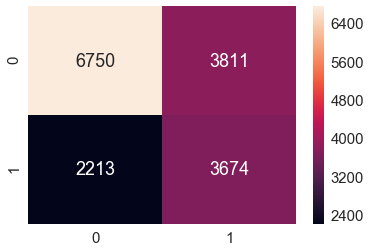

In [22]:
## ESTOU AQUI!!!
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced
from sklearn import model_selection
from collections import Counter

classifier = RandomForestClassifier

df_downsampled.fillna(-1, inplace=True)

# Com os dados train unbalanced
X = df_downsampled.drop(['SK_ID_CURR', 'TARGET'], axis=1)
Y = df_downsampled['TARGET']

teste_size = 0.3
seed = 2018

X_train, X_test, Y_train, Y_test = model_selection. \
                                        train_test_split(X, Y, 
                                                         test_size= teste_size, 
                                                         random_state = seed)

# build model with SMOTE imblearn
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), 
                               classifier(random_state=42))

smote_model = smote_pipeline.fit(X_train, Y_train)
smote_prediction = smote_model.predict(X_test)

#Showing the diference before and after the transformation used
print("normal data distribution: {}".format(Counter(Y)))
X_smote, y_smote = SMOTE().fit_sample(X, Y)
print("SMOTE data distribution: {}".format(Counter(y_smote)))

# Verificaar os resultados obtidos
print('Accuracy: {}'.format(accuracy_score(Y_test,smote_prediction)))
print("\n")
print('fbeta: {}'.format(fbeta_score(Y_test, smote_prediction, beta=2)))
print("\n")
print(classification_report(Y_test, smote_prediction))

print("\n Confusion Matrix:")
print(confusion_matrix(Y_test, smote_prediction))

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(smote_prediction, Y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

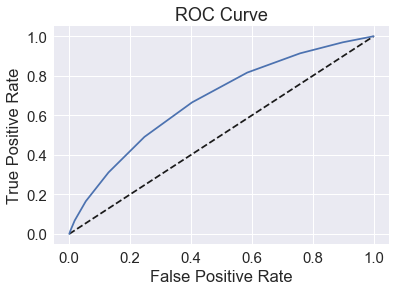

In [25]:
from sklearn.metrics import roc_curve

#Predicting proba
y_pred_prob = smote_model.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [57]:
from sklearn import model_selection

# Com os dados train unbalanced
# X = train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
# Y = train['TARGET']

# Com os dados balanced - aplicado resample downsampled
X = df_downsampled.drop(['SK_ID_CURR', 'TARGET'], axis=1)
Y = df_downsampled['TARGET']

# Com os dados balanced - aplicado resample upsampled
# X = df_upsampled.drop(['SK_ID_CURR', 'TARGET'], axis=1)
# Y = df_upsampled['TARGET']

# Obs.: Qnd uso 0.30 o resultado no kaggle é melhor
teste_size = 0.25
seed = 2018

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size= teste_size, random_state = seed)

model1 = RandomForestClassifier()
model1.fit(X_train, Y_train)

resultado = model1.score(X_test, Y_test)

print(resultado)

0.640037936821


## Testando outros modelos 

** Melhor modelos no momento:**

1. GradientBoostingClassifier usando Grid Search - 0.69193587368
2. GradientBoostingClassifier - GBC: 0.685877 (0.005219)
3. RandomForestClassifier - 0.623680 (0.006352)


In [17]:
!pip install xgboost

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



RF: 0.640931 (0.008554)
GBC: 0.672617 (0.006351)
XGB: 0.679027 (0.007153)


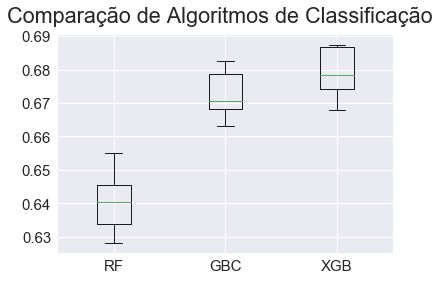

In [26]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

num_folds = 10
num_instances = len(X_train)
seed = 7

modelos = []
#modelos.append(('LR', LogisticRegression()))
#modelos.append(('CART', DecisionTreeClassifier()))
#modelos.append(('NB', GaussianNB()))
modelos.append(('RF', RandomForestClassifier(max_depth=3, max_features=20, n_estimators=5, random_state=seed)))
#modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('GBC', GradientBoostingClassifier(max_depth=5, learning_rate = 0.01, random_state=seed)))
modelos.append(('XGB', XGBClassifier(n_estimators=5, seed=seed, learning_rate=0.8, max_depth=5)))
#modelos.append(('AdaBoost', AdaBoostClassifier(n_estimators=5)))



# RESULTADO: SVC: 0.497784 (0.010603)
# modelos.append(('SVC', SVC())) 

# Avaliando cada modelo
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = cross_validation.KFold(n = num_instances, n_folds = num_folds, random_state = seed)
    cv_results = cross_validation.cross_val_score(modelo, X_train, Y_train, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()


### Otimizando Modelo com Grid Search

** Random Forest **

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth": [3,5, 10,None],
              "n_estimators":[3,5,10,25],
              "max_features": [4,7,15,20, 25]}

#Creating the classifier
model = RandomForestClassifier(random_state=2)

grid_search2 = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=4)
grid_search2.fit(X_train, Y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)

print('Predict ...')
y_pred = grid_search2.predict(X_test)

# Verificaar os resultados obtidos
print('Accuracy: {}'.format(accuracy_score(Y_test,y_pred)))
print("\n")
print('fbeta: {}'.format(fbeta_score(Y_test, y_pred, beta=2)))
print("\n")
print(classification_report(Y_test, y_pred))

print("\n Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, Y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.5878061490359562, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.59627410109432, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.6067752442996742, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.6015635179153095, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.6037785016286645, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=5 .....................
[CV]  max_depth=3, max_features=4, n_estimators=5, score=0.5888483585200626, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=5 .....................
[CV]  max_depth=3, max_features=4, n_estimators=5, score=0.5995310057321521, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=5 .....................
[CV]  max_depth=3, max_features=4, n_estimators=5, score=0.5937459283387622, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=5 .....................
[CV]  max_depth=3, max_features=4, n_estimators=5, score=0.5994788273615635, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=5 .....................
[CV]  max_depth=3, max_features=4, n_estimators=5, score=0.609771986970684, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=10 ....................
[CV]  max_depth=3, max_featur

[CV]  max_depth=3, max_features=15, n_estimators=25, score=0.6447368421052632, total=   0.7s
[CV] max_depth=3, max_features=15, n_estimators=25 ...................
[CV]  max_depth=3, max_features=15, n_estimators=25, score=0.6486451276706618, total=   0.7s
[CV] max_depth=3, max_features=15, n_estimators=25 ...................
[CV]  max_depth=3, max_features=15, n_estimators=25, score=0.648599348534202, total=   0.7s
[CV] max_depth=3, max_features=15, n_estimators=25 ...................
[CV]  max_depth=3, max_features=15, n_estimators=25, score=0.6402605863192182, total=   0.7s
[CV] max_depth=3, max_features=15, n_estimators=25 ...................
[CV]  max_depth=3, max_features=15, n_estimators=25, score=0.6555048859934853, total=   0.7s
[CV] max_depth=3, max_features=20, n_estimators=3 ....................
[CV]  max_depth=3, max_features=20, n_estimators=3, score=0.6301459093277749, total=   0.2s
[CV] max_depth=3, max_features=20, n_estimators=3 ....................
[CV]  max_depth=3,

[CV]  max_depth=5, max_features=4, n_estimators=5, score=0.6188925081433225, total=   0.1s
[CV] max_depth=5, max_features=4, n_estimators=5 .....................
[CV]  max_depth=5, max_features=4, n_estimators=5, score=0.6036482084690554, total=   0.1s
[CV] max_depth=5, max_features=4, n_estimators=5 .....................
[CV]  max_depth=5, max_features=4, n_estimators=5, score=0.6332247557003258, total=   0.1s
[CV] max_depth=5, max_features=4, n_estimators=10 ....................
[CV]  max_depth=5, max_features=4, n_estimators=10, score=0.6104742053152684, total=   0.2s
[CV] max_depth=5, max_features=4, n_estimators=10 ....................
[CV]  max_depth=5, max_features=4, n_estimators=10, score=0.6255862428348098, total=   0.2s
[CV] max_depth=5, max_features=4, n_estimators=10 ....................
[CV]  max_depth=5, max_features=4, n_estimators=10, score=0.6190228013029316, total=   0.2s
[CV] max_depth=5, max_features=4, n_estimators=10 ....................
[CV]  max_depth=5, max_fe

[CV]  max_depth=5, max_features=15, n_estimators=25, score=0.6525081433224755, total=   1.1s
[CV] max_depth=5, max_features=15, n_estimators=25 ...................
[CV]  max_depth=5, max_features=15, n_estimators=25, score=0.6715309446254072, total=   1.1s
[CV] max_depth=5, max_features=20, n_estimators=3 ....................
[CV]  max_depth=5, max_features=20, n_estimators=3, score=0.6495570609692548, total=   0.2s
[CV] max_depth=5, max_features=20, n_estimators=3 ....................
[CV]  max_depth=5, max_features=20, n_estimators=3, score=0.6590672225117249, total=   0.2s
[CV] max_depth=5, max_features=20, n_estimators=3 ....................
[CV]  max_depth=5, max_features=20, n_estimators=3, score=0.6538110749185668, total=   0.2s
[CV] max_depth=5, max_features=20, n_estimators=3 ....................
[CV]  max_depth=5, max_features=20, n_estimators=3, score=0.6457328990228013, total=   0.2s
[CV] max_depth=5, max_features=20, n_estimators=3 ....................
[CV]  max_depth=5, m

[CV]  max_depth=10, max_features=4, n_estimators=5, score=0.6346579804560261, total=   0.2s
[CV] max_depth=10, max_features=4, n_estimators=10 ...................
[CV]  max_depth=10, max_features=4, n_estimators=10, score=0.6410891089108911, total=   0.3s
[CV] max_depth=10, max_features=4, n_estimators=10 ...................
[CV]  max_depth=10, max_features=4, n_estimators=10, score=0.650990099009901, total=   0.3s
[CV] max_depth=10, max_features=4, n_estimators=10 ...................
[CV]  max_depth=10, max_features=4, n_estimators=10, score=0.6450814332247558, total=   0.3s
[CV] max_depth=10, max_features=4, n_estimators=10 ...................
[CV]  max_depth=10, max_features=4, n_estimators=10, score=0.6289250814332248, total=   0.3s
[CV] max_depth=10, max_features=4, n_estimators=10 ...................
[CV]  max_depth=10, max_features=4, n_estimators=10, score=0.6509446254071661, total=   0.3s
[CV] max_depth=10, max_features=4, n_estimators=25 ...................
[CV]  max_depth=10

[CV]  max_depth=10, max_features=20, n_estimators=3, score=0.640568004168838, total=   0.4s
[CV] max_depth=10, max_features=20, n_estimators=3 ...................
[CV]  max_depth=10, max_features=20, n_estimators=3, score=0.6522928608650339, total=   0.4s
[CV] max_depth=10, max_features=20, n_estimators=3 ...................
[CV]  max_depth=10, max_features=20, n_estimators=3, score=0.6373941368078175, total=   0.4s
[CV] max_depth=10, max_features=20, n_estimators=3 ...................
[CV]  max_depth=10, max_features=20, n_estimators=3, score=0.6435179153094462, total=   0.4s
[CV] max_depth=10, max_features=20, n_estimators=3 ...................
[CV]  max_depth=10, max_features=20, n_estimators=3, score=0.6538110749185668, total=   0.4s
[CV] max_depth=10, max_features=20, n_estimators=5 ...................
[CV]  max_depth=10, max_features=20, n_estimators=5, score=0.6470818134445023, total=   0.6s
[CV] max_depth=10, max_features=20, n_estimators=5 ...................
[CV]  max_depth=1

[CV]  max_depth=None, max_features=4, n_estimators=10, score=0.6133402813965607, total=   0.6s
[CV] max_depth=None, max_features=4, n_estimators=10 .................
[CV]  max_depth=None, max_features=4, n_estimators=10, score=0.6189421573736321, total=   0.7s
[CV] max_depth=None, max_features=4, n_estimators=10 .................
[CV]  max_depth=None, max_features=4, n_estimators=10, score=0.6185016286644951, total=   0.7s
[CV] max_depth=None, max_features=4, n_estimators=10 .................
[CV]  max_depth=None, max_features=4, n_estimators=10, score=0.6063843648208469, total=   0.7s
[CV] max_depth=None, max_features=4, n_estimators=10 .................
[CV]  max_depth=None, max_features=4, n_estimators=10, score=0.6277524429967427, total=   0.7s
[CV] max_depth=None, max_features=4, n_estimators=25 .................
[CV]  max_depth=None, max_features=4, n_estimators=25, score=0.6326211568525274, total=   1.6s
[CV] max_depth=None, max_features=4, n_estimators=25 .................
[CV]

[CV]  max_depth=None, max_features=20, n_estimators=3, score=0.6022668056279312, total=   0.7s
[CV] max_depth=None, max_features=20, n_estimators=3 .................
[CV]  max_depth=None, max_features=20, n_estimators=3, score=0.6132100052110474, total=   0.7s
[CV] max_depth=None, max_features=20, n_estimators=3 .................
[CV]  max_depth=None, max_features=20, n_estimators=3, score=0.5904885993485341, total=   0.7s
[CV] max_depth=None, max_features=20, n_estimators=3 .................
[CV]  max_depth=None, max_features=20, n_estimators=3, score=0.5953094462540717, total=   0.7s
[CV] max_depth=None, max_features=20, n_estimators=3 .................
[CV]  max_depth=None, max_features=20, n_estimators=3, score=0.6155048859934853, total=   0.7s
[CV] max_depth=None, max_features=20, n_estimators=5 .................
[CV]  max_depth=None, max_features=20, n_estimators=5, score=0.622980719124544, total=   1.2s
[CV] max_depth=None, max_features=20, n_estimators=5 .................
[CV] 

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  6.2min finished


NameError: name 'grid_search' is not defined

In [ ]:
print(grid_search2.best_score_)
print(grid_search2.best_params_)

In [31]:
#trainning with the best params

#model_rf = RandomForestClassifier(max_depth=3, max_features=20, n_estimators=5, random_state=7)

#model_rf.fit(X_train, Y_train)
#y_pred = model_rf.predict(X_test)


y_pred = grid_search.predict(X_test)

# Verificaar os resultados obtidos
print('Accuracy: {}'.format(accuracy_score(Y_test,y_pred)))
print("\n")
print('fbeta: {}'.format(fbeta_score(Y_test, y_pred, beta=2)))
print("\n")
print(classification_report(Y_test, y_pred))

print("\n Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, Y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [28]:
from sklearn.preprocessing import MinMaxScaler, Imputer

# Drop the target from the training data
app_train = X_train.copy() #train.drop(['TARGET'], axis=1).copy()
    
# Feature names
features = list(app_train.columns)

# Copy of the testing data
app_test = X_test.copy()

app_test2 = test.drop('SK_ID_CURR', axis=1).copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(app_train)

# Transform both training and testing data
app_train = imputer.transform(app_train)
app_test = imputer.transform(app_test)
app_test2 = imputer.transform(app_test2)

# Repeat with the scaler
scaler.fit(app_train)
app_train = scaler.transform(app_train)
app_test = scaler.transform(app_test)
app_test2 = scaler.transform(app_test2)

#app_train = pd.DataFrame(app_train)
#app_train['TARGET'] = train['TARGET']

print('Training data shape: ', app_train.shape)
print('Testing data shape: ', app_test.shape)
print('Testing data shape: ', app_test2.shape)

Training data shape:  (38377, 185)
Testing data shape:  (16448, 185)
Testing data shape:  (48744, 185)


### Melhor modelo ate o momento 

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] max_depth=3 .....................................................
[CV] ............ max_depth=3, score=0.6844790547798066, total=  11.5s
[CV] max_depth=3 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s


[CV] ............ max_depth=3, score=0.6906552094522019, total=  11.6s
[CV] max_depth=3 .....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   23.3s remaining:    0.0s


[CV] ............ max_depth=3, score=0.6892708473210689, total=  11.7s
[CV] max_depth=3 .....................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   35.1s remaining:    0.0s


[CV] ............ max_depth=3, score=0.6833624278232845, total=  11.9s
[CV] max_depth=3 .....................................................
[CV] ............ max_depth=3, score=0.6872566134013697, total=  11.4s
[CV] max_depth=5 .....................................................
[CV] ............ max_depth=5, score=0.6838077336197637, total=  30.1s
[CV] max_depth=5 .....................................................
[CV] ............ max_depth=5, score=0.6925349087003222, total=  29.5s
[CV] max_depth=5 .....................................................
[CV] ............. max_depth=5, score=0.693165032899154, total=  29.6s
[CV] max_depth=5 .....................................................
[CV] ............. max_depth=5, score=0.680273935813079, total=  31.6s
[CV] max_depth=5 .....................................................
[CV] ............ max_depth=5, score=0.6883308714918759, total=  32.3s
[CV] max_depth=6 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 15.3min finished


Predict ...
Accuracy: 0.6919358736808185


fbeta: 0.692302780704275


             precision    recall  f1-score   support

          0       0.69      0.69      0.69      6138
          1       0.70      0.69      0.69      6275

avg / total       0.69      0.69      0.69     12413


 Confusion Matrix:
[[4252 1886]
 [1938 4337]]


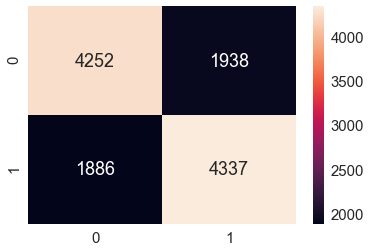

In [32]:


#Seting the Hyper Parameters
param_test1 = {
 'max_depth':[3,5,6,8]
}

#Creating the classifier
model_xg = GradientBoostingClassifier(random_state=7)

grid_search = GridSearchCV(model_xg, param_grid=param_test1, cv=5, scoring='accuracy', verbose=4)
grid_search.fit(X_train, Y_train)

print('Predict ...')
y_pred = grid_search.predict(X_test)

# Verificaar os resultados obtidos
print('Accuracy: {}'.format(accuracy_score(Y_test,y_pred)))
print("\n")
print('fbeta: {}'.format(fbeta_score(Y_test, y_pred, beta=2)))
print("\n")
print(classification_report(Y_test, y_pred))

print("\n Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, Y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [33]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.687622525982
{'max_depth': 5}


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] n_estimators=250 ................................................
[CV] n_estimators=250 ................................................
[CV] n_estimators=250 ................................................
[CV] n_estimators=250 ................................................
[CV] ....... n_estimators=250, score=0.7605154788374755, total=  11.9s
[CV] n_estimators=250 ................................................
[CV] ....... n_estimators=250, score=0.7607810374810587, total=  11.9s
[CV] ....... n_estimators=250, score=0.7642183313159752, total=  12.2s
[CV] ....... n_estimators=250, score=0.7596134470231275, total=  12.0s


[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:   13.2s remaining:   19.7s


[CV] ....... n_estimators=250, score=0.7726930646977397, total=   9.2s


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   22.5s finished


Predict ...
Best params: {'n_estimators': 250} - Best score: 0.7635642718710753
Accuracy: 0.7000851167315175


fbeta: 0.6387952593236925


             precision    recall  f1-score   support

          0       0.71      0.76      0.73      8963
          1       0.69      0.63      0.66      7485

avg / total       0.70      0.70      0.70     16448


 Confusion Matrix:
[[6815 2148]
 [2785 4700]]


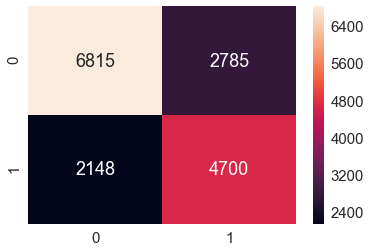

In [29]:
## MELHOR MODELO ATE ENTAO - 24/09

# COm as novas features deu overfitting. Pensar em como resolver 

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# param_test1 = {'n_estimators':range(20,250,10)}
param_test1 = {'n_estimators': [250]}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, 
                                                               min_samples_split=500,
                                                               min_samples_leaf=50,
                                                               max_depth=5,
                                                               max_features='sqrt',
                                                               subsample=0.8,
                                                               random_state=10),
                        param_grid = param_test1, 
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False, 
                        cv=5, 
                       verbose=4)

gsearch1.fit(X_train,Y_train)


print('Predict ...')
y_pred = gsearch1.predict(X_test)

print('Best params: {0} - Best score: {1}'.format(gsearch1.best_params_, gsearch1.best_score_))

# Verificaar os resultados obtidos
print('Accuracy: {}'.format(accuracy_score(Y_test,y_pred)))
print("\n")
print('fbeta: {}'.format(fbeta_score(Y_test, y_pred, beta=2)))
print("\n")
print(classification_report(Y_test, y_pred))

print("\n Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, Y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()



Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] learning_rate=0.1 ...............................................
[CV] learning_rate=0.1 ...............................................
[CV] learning_rate=0.1 ...............................................
[CV] learning_rate=0.1 ...............................................
[CV] ....... learning_rate=0.1, score=0.760346703264173, total=  11.8s
[CV] learning_rate=0.1 ...............................................
[CV] ...... learning_rate=0.1, score=0.7638479569864178, total=  11.9s
[CV] ...... learning_rate=0.1, score=0.7605005004840342, total=  11.8s
[CV] learning_rate=0.01 ..............................................
[CV] learning_rate=0.01 ..............................................
[CV] ...... learning_rate=0.1, score=0.7593484687601183, total=  12.0s
[CV] learning_rate=0.01 ..............................................
[CV] ...... learning_rate=0.1, score=0.7724433024653534, total=  12.6s
[CV] learning_rat

[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:   44.7s remaining:   11.2s


[CV] .... learning_rate=0.001, score=0.7193159832201453, total=  13.7s
[CV] .... learning_rate=0.001, score=0.7168651056390062, total=  13.3s
[CV] .... learning_rate=0.001, score=0.7353098820031096, total=  13.0s


[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:   58.0s finished


Predict ...
Best params: {'learning_rate': 0.1} - Best score: 0.7632973863920194
Accuracy: 0.6999635214007782


fbeta: 0.6383557174705018


             precision    recall  f1-score   support

          0       0.71      0.76      0.73      8963
          1       0.69      0.63      0.66      7485

avg / total       0.70      0.70      0.70     16448


 Confusion Matrix:
[[6817 2146]
 [2789 4696]]


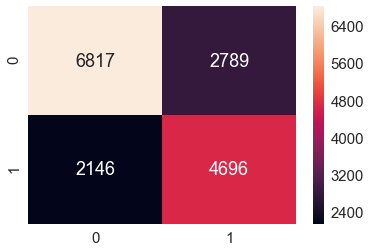

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

param_test1 = {'learning_rate': [0.1,0.01,0.001]}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(min_samples_split=500,
                                                               min_samples_leaf=50,
                                                               max_depth=5,
                                                               max_features='sqrt',
                                                               subsample=0.8,
                                                               random_state=10, 
                                                               n_estimators=240),
                                        param_grid = param_test1, 
                                        scoring='roc_auc',
                                        n_jobs=4,
                                        iid=False, 
                                        cv=5, 
                                       verbose=4)

gsearch1.fit(X_train,Y_train)


print('Predict ...')
y_pred = gsearch1.predict(X_test)

print('Best params: {0} - Best score: {1}'.format(gsearch1.best_params_, gsearch1.best_score_))

# Verificaar os resultados obtidos
print('Accuracy: {}'.format(accuracy_score(Y_test,y_pred)))
print("\n")
print('fbeta: {}'.format(fbeta_score(Y_test, y_pred, beta=2)))
print("\n")
print(classification_report(Y_test, y_pred))

print("\n Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, Y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()



Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] subsample=0.8 ...................................................
[CV] subsample=0.8 ...................................................
[CV] subsample=0.8 ...................................................
[CV] subsample=0.8 ...................................................
[CV] .......... subsample=0.8, score=0.7510235465233555, total=  15.0s
[CV] subsample=0.8 ...................................................
[CV] .......... subsample=0.8, score=0.7609406864606836, total=  15.0s


[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:   16.3s remaining:   24.5s


[CV] .......... subsample=0.8, score=0.7571739564790716, total=  15.1s
[CV] .......... subsample=0.8, score=0.7602935212558293, total=  15.1s
[CV] .......... subsample=0.8, score=0.7681068783926577, total=  10.5s


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   27.2s finished


Predict ...
Best params: {'subsample': 0.8} - Best score: 0.7595077178223196
Accuracy: 0.6975997665426424


fbeta: 0.6322121688958825


             precision    recall  f1-score   support

          0       0.71      0.76      0.73      7492
          1       0.68      0.62      0.65      6215

avg / total       0.70      0.70      0.70     13707


 Confusion Matrix:
[[5705 1787]
 [2358 3857]]


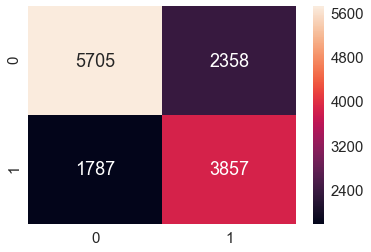

In [21]:
## ULTIMO MODELO TESTADO - resultado caiu para 0.67938

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

param_test1 = {'subsample': [0.8]}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,
                                                               min_samples_split=500,
                                                               min_samples_leaf=50,
                                                               max_depth=5,
                                                               max_features='sqrt',
                                                               random_state=10, 
                                                               n_estimators=240),
                                        param_grid = param_test1, 
                                        scoring='roc_auc',
                                        n_jobs=4,
                                        iid=False, 
                                        cv=5, 
                                       verbose=4)

gsearch1.fit(X_train,Y_train)


print('Predict ...')
y_pred = gsearch1.predict(X_test)

print('Best params: {0} - Best score: {1}'.format(gsearch1.best_params_, gsearch1.best_score_))

# Verificaar os resultados obtidos
print('Accuracy: {}'.format(accuracy_score(Y_test,y_pred)))
print("\n")
print('fbeta: {}'.format(fbeta_score(Y_test, y_pred, beta=2)))
print("\n")
print(classification_report(Y_test, y_pred))

print("\n Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, Y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()


## Validação dos modelos

In [44]:
# Gradient Boosting 
rf = modelos[1][1]

# Random Forest
# rf = model1 

rf.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=0.5, verbose=0,
              warm_start=False)

Accuracy: 0.686377185209055


fbeta: 0.6874321822939937


             precision    recall  f1-score   support

          0       0.68      0.69      0.68      6138
          1       0.69      0.69      0.69      6275

avg / total       0.69      0.69      0.69     12413


 Confusion Matrix:
[[4212 1926]
 [1967 4308]]


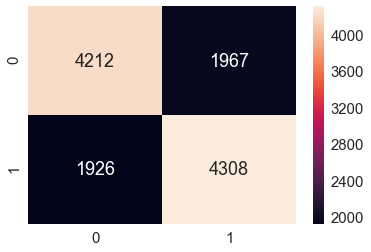

In [45]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import fbeta_score
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)

# Verificaar os resultados obtidos
print('Accuracy: {}'.format(accuracy_score(Y_test,y_pred)))
print("\n")
print('fbeta: {}'.format(fbeta_score(Y_test, y_pred, beta=2)))
print("\n")
print(classification_report(Y_test, y_pred))

print("\n Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, Y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

Accuracy: 0.6886328848787562


fbeta: 0.6879312547917199


             precision    recall  f1-score   support

          0       0.68      0.69      0.69      6138
          1       0.69      0.69      0.69      6275

avg / total       0.69      0.69      0.69     12413


 Confusion Matrix:
[[4241 1897]
 [1968 4307]]


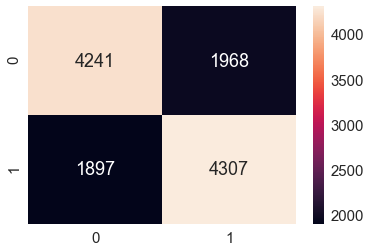

In [37]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import fbeta_score
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)

# Verificaar os resultados obtidos
print('Accuracy: {}'.format(accuracy_score(Y_test,y_pred)))
print("\n")
print('fbeta: {}'.format(fbeta_score(Y_test, y_pred, beta=2)))
print("\n")
print(classification_report(Y_test, y_pred))

print("\n Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, Y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

### Diagnosticando se o modelo sofre de Overfitting

In [33]:
annotation_kw = {'xycoords': 'data', 'textcoords': 'data', 'arrowprops': {'arrowstyle': '->', 'connectionstyle': 'arc'}}

def deviance_plot(est, X_test, y_test, ax=None, label='', train_color='#2c7bb6', test_color='#d7191c', alpha=1.0, ylim = (0, 10)):
    n_estimators = len(est.estimators_)
    test_dev = np.empty(n_estimators)
    FIGSIZE = (11, 7)

    for i, pred in enumerate(est.staged_predict(X_test)):
       test_dev[i] = est.loss_(y_test, pred)

    if ax is None:
        fig = plt.figure(figsize = FIGSIZE)
        ax = plt.gca()
        
    ax.plot(np.arange(n_estimators) + 1, test_dev, color = test_color, label = 'Teste %s' % label, linewidth = 2, alpha = alpha)
    ax.plot(np.arange(n_estimators) + 1, est.train_score_, color = train_color, label = 'Treino %s' % label, linewidth = 2, alpha = alpha)
    ax.set_ylabel('Erro')
    ax.set_xlabel('Número de Estimadores Base')
    ax.set_ylim(ylim)
    return test_dev, ax

# Aplica a função aos dados de teste para medir o overfitting do nosso modelo (est)
test_dev, ax = deviance_plot(rf, X_test, Y_test)
ax.legend(loc = 'upper right')

# Legendas
ax.annotate('Menor nível de erro no dataset de Teste', 
            xy = (test_dev.argmin() + 1, test_dev.min() + 0.02), 
            xytext = (150, 3.5), 
            **annotation_kw)

ann = ax.annotate('', xy = (800, test_dev[799]),  xycoords = 'data',
                  xytext = (800, est.train_score_[799]), textcoords = 'data',
                  arrowprops = {'arrowstyle': '<->'})
ax.text(810, 3.5, 'Gap Treino-Teste')

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

**Confusion Matrix**

Confusion matrix, without normalization
[[5323 2072]
 [3504 3996]]


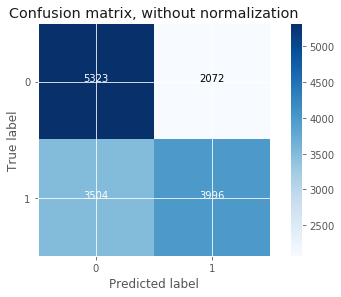

In [32]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_pred)
np.set_printoptions(precision=2)

class_names = [0,1]

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

Confusion matrix, without normalization
[[4378 1760]
 [2854 3421]]


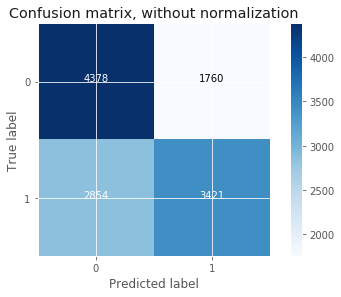

In [44]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_pred)
np.set_printoptions(precision=2)

class_names = [0,1]

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

**ROC Curve**

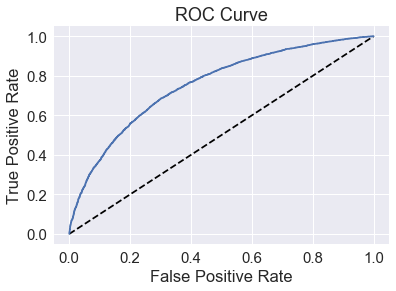

In [32]:
from sklearn.metrics import roc_curve

#Predicting proba
y_pred_prob = grid_search.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

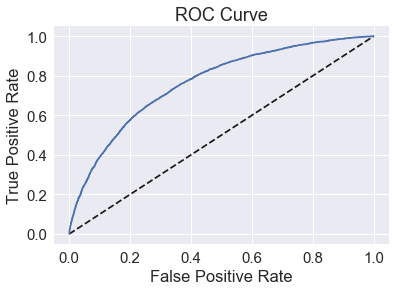

In [34]:
from sklearn.metrics import roc_curve

#Predicting proba
y_pred_prob = gsearch1.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

**Salva modelo no disco rigido**

In [ ]:
import pickle

# Salvando o modelo
arquivo = 'modelo_v1.sav'
pickle.dump(modelo, open(arquivo, 'wb'))

# Carregando o arquivo
modelo_v1 = pickle.load(open(arquivo, 'rb'))
resultado = modelo_v1.score(X_teste, Y_teste)

In [38]:
df_resultado = pd.DataFrame()



df_resultado['SK_ID_CURR'] = test['SK_ID_CURR']
test_predict = app_test2

# test_predict.head()

df_resultado['TARGET'] = gsearch1.predict(test_predict)

df_resultado.to_csv('resultado_13_gridsearch1.csv', index=False)

### Todo: Testar o pipeline abaixo

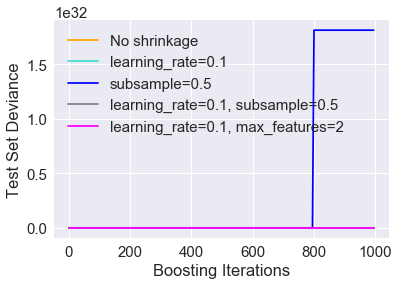

In [42]:
# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets


# map labels from {-1, 1} to {0, 1}
labels, y = np.unique(Y, return_inverse=True)

original_params = {'n_estimators': 1000, 'max_leaf_nodes': 4, 'max_depth': None, 'random_state': 2,
                   'min_samples_split': 5}

plt.figure()

for label, color, setting in [('No shrinkage', 'orange',
                               {'learning_rate': 1.0, 'subsample': 1.0}),
                              ('learning_rate=0.1', 'turquoise',
                               {'learning_rate': 0.1, 'subsample': 1.0}),
                              ('subsample=0.5', 'blue',
                               {'learning_rate': 1.0, 'subsample': 0.5}),
                              ('learning_rate=0.1, subsample=0.5', 'gray',
                               {'learning_rate': 0.1, 'subsample': 0.5}),
                              ('learning_rate=0.1, max_features=2', 'magenta',
                               {'learning_rate': 0.1, 'max_features': 2})]:
    params = dict(original_params)
    params.update(setting)

    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, Y_train)

    # compute test set deviance
    test_deviance = np.zeros((params['n_estimators'],), dtype=np.float64)

    for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
        # clf.loss_ assumes that y_test[i] in {0, 1}
        test_deviance[i] = clf.loss_(Y_test, y_pred)

    plt.plot((np.arange(test_deviance.shape[0]) + 1)[::5], test_deviance[::5],
            '-', color=color, label=label)

plt.legend(loc='upper left')
plt.xlabel('Boosting Iterations')
plt.ylabel('Test Set Deviance')

plt.show()

## RASCUNHO

In [ ]:
temp = train["ORGANIZATION_TYPE"].value_counts()
temp.iplot(kind='bar', xTitle = 'Organization Name', yTitle = "Count", 
           title = 'Types of Organizations who applied for loan ', color = 'red')

In [ ]:
# Criando o data set por Tipo de Organização

def create_score_organization_type():

    temp = pd.DataFrame(train.groupby(['ORGANIZATION_TYPE', 'TARGET']).size())
    temp.reset_index(inplace=True)
    temp.rename(columns = {0:'Qtde'}, inplace = True)

    score_organization = pd.pivot_table(temp,index=['ORGANIZATION_TYPE'], columns=['TARGET'], 
                                        values=['Qtde'], aggfunc=[np.sum], fill_value=0, margins=True)
    score_organization.reset_index(inplace=True)
    score_organization.rename(columns={ 0:'good_credit', 1:'bad_credit'}, inplace=True)
    score_organization = score_organization.sort_values(by=[('sum', 'Qtde', 'All')], ascending=False)[1:len(score_organization)]

    return score_organization

score_organization = create_score_organization_type()


In [ ]:
trace1 = go.Bar(
    x = score_organization['ORGANIZATION_TYPE'],
    y = score_organization[('sum', 'Qtde', 'good_credit')],
    name = 'Good'
)
trace2 = go.Bar(
    x = score_organization['ORGANIZATION_TYPE'],
    y = score_organization[('sum', 'Qtde', 'bad_credit')],
    name = 'Bad'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack', 
    title='Contratos por Tipo de Organização'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [ ]:
temp = train["OCCUPATION_TYPE"].value_counts()
temp.iplot(kind='bar', xTitle = 'Occupation', yTitle = "Count", title = 'Occupation of Applicant\'s who applied for loan', color = 'green')